# Tier 2. Module 2: Numerical Programming in Python

## Topic 1 - Eigenvalues ​​and vectors
## Homework

Spectral clustering task on the `Iris` dataset. You will load data, perform data analysis, perform spectral clustering, and evaluate the results using the Confusion Matrix.

This will help you consolidate the following skills:
* Working with the `sklearn` library to load and process data.
* Using `seaborn` to visualize the distribution of data by classes.
* Application of data standardization methods to prepare them for clustering.
* Understanding and experimenting with spectral clustering parameters.
* Evaluation of results using Confusion Matrix and clustering visualization.

### Task

#### 1. Download and create a DataFrame using `load_iris()` from the `sklearn` library.

In [8]:
# pip install pandas seaborn scikit-learn
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target  # add a column to df with target values from iris

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 2. Obtain basic statistical characteristics

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### 3. Visualize the distribution of observations by classes

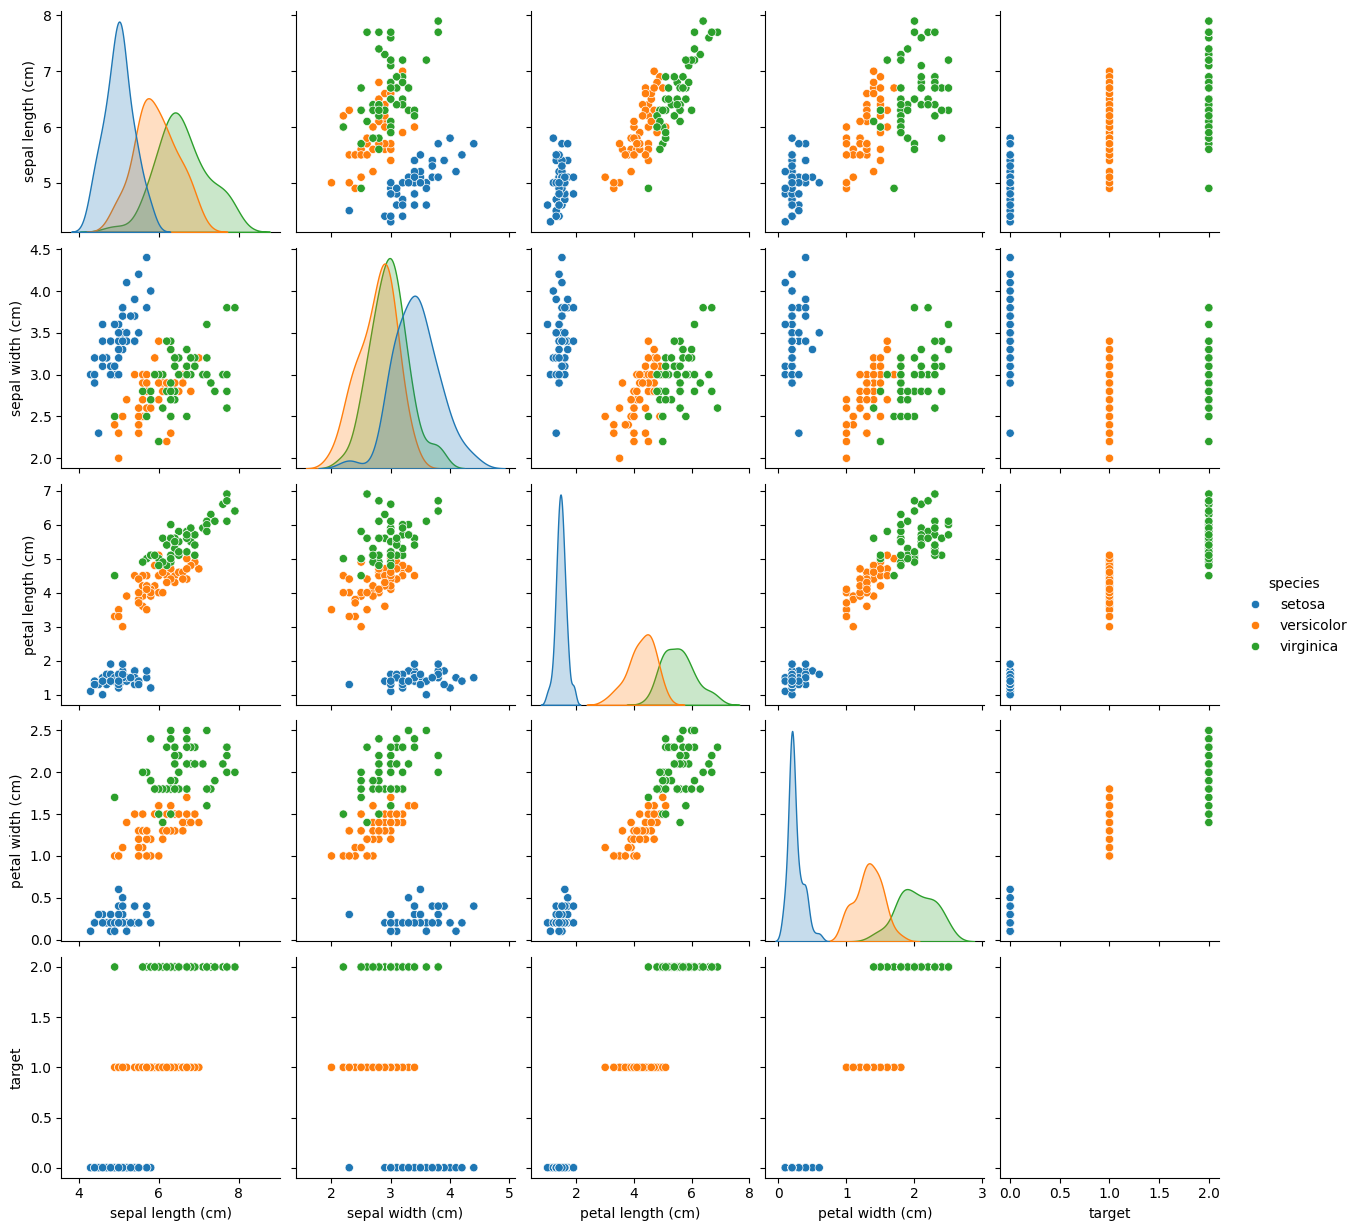

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a column to df with species names that match the values ​​0-2 from the "target" column
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

sns.pairplot(df, hue='species')
plt.show()

#### 4. Perform data standardization

In [13]:
from sklearn.preprocessing import StandardScaler

# StandardScaler subtracts the mean value from each value of a feature (new mean value is 0)
# and then divides the centered values by the feature's std deviation (new std deviation is 0)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-2])
# [:, :-2] - include all rows but exclude two last columns with target and species

df_scaled = pd.DataFrame(df_scaled, columns=iris.feature_names)
df_scaled['target'] = df['target']
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [14]:
df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,0.000000
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,0.000000
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,1.000000
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,2.000000
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,2.000000


#### 5. Perform spectral clustering

In [26]:
from sklearn.cluster import SpectralClustering

# SpectralClustering predicts the division of elements into clusters using Similarity Matrix,
# Laplacian Matrix, Eigenvalues and Eigenvectors

spectral_clust = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
df_scaled['cluster'] = spectral_clust.fit_predict(df_scaled.iloc[:, :-1])
# predicted values are stored in the column 'cluster' of the scaled df

df_scaled.tail(60)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
90,-0.416010,-1.052767,0.364896,0.000878,1,2
91,0.310998,-0.131979,0.478571,0.264142,1,2
92,-0.052506,-1.052767,0.137547,0.000878,1,2
93,-1.021849,-1.743357,-0.260315,-0.262387,1,2
94,-0.294842,-0.822570,0.251221,0.132510,1,2
95,-0.173674,-0.131979,0.251221,0.000878,1,2
96,-0.173674,-0.362176,0.251221,0.132510,1,2
97,0.432165,-0.362176,0.308059,0.132510,1,2
98,-0.900681,-1.282963,-0.430828,-0.130755,1,2
99,-0.173674,-0.592373,0.194384,0.132510,1,2


#### 6. Compare the predicted clusters and the valid classes

In [30]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(df_scaled['target'], df_scaled['cluster'])
conf_matrix

array([[ 0, 50,  0],
       [ 0,  0, 50],
       [49,  0,  1]])

#### 7. Visualize the clustering results

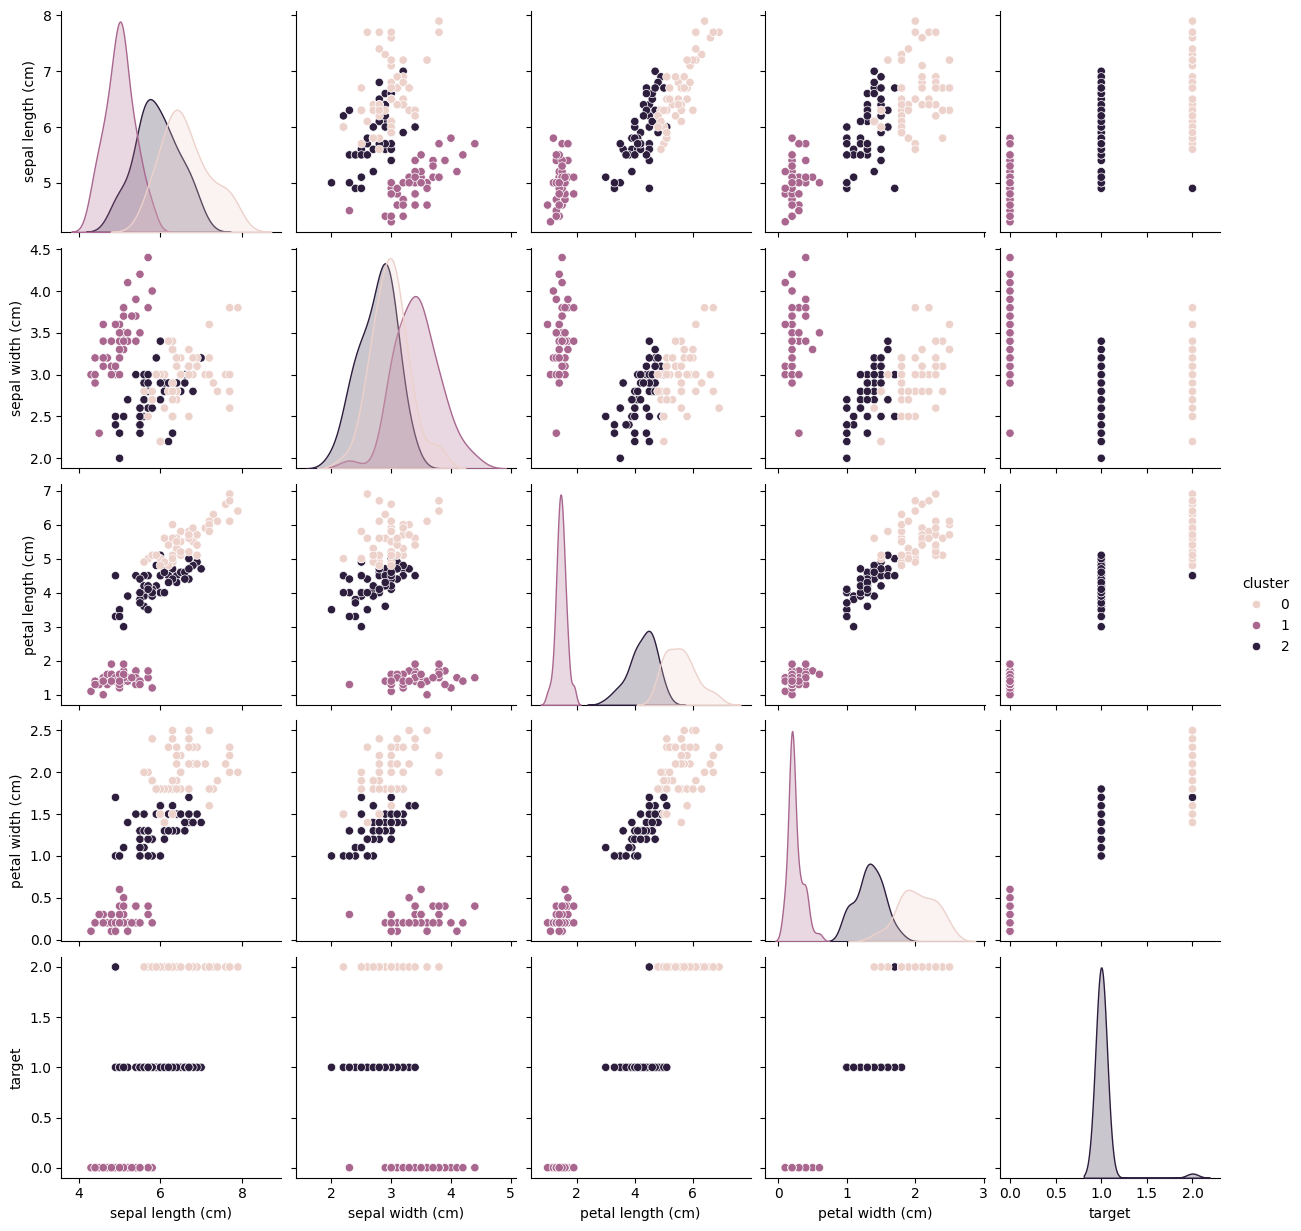

In [31]:
df['cluster'] = df_scaled['cluster'] # Add cluster labels to the original df

sns.pairplot(df, hue='cluster')
plt.show()

#### 8. Conclusion

The spectral clustering algorithm was applied to the Iris dataset after standardizing the features. The resulting clusters were compared to the actual species labels using a confusion matrix. The pairplot visualizations indicate how the clusters formed by the spectral clustering algorithm align with the actual species categories.

From the confusion matrix, we can observe that:
* **Cluster 0**: the predicted cluster is **98%** consistent with the actual "*virginica*" species. From the `pairplot` visualization of the clustering, it can be seen that the only object that was misinterpreted has an abnormally short sepal length that is not typical of the "*virginica*" species. This, obviously, was the cause of the error.
* **Cluster 1**: the predicted cluster is **100%** consistent with the actual "*versicolor*" species.
* **Cluster 2**: the predicted cluster is **100%** consistent with the actual "*setosa*" species.

The `pairplot` further illustrates a strong linear relationship between the sepal length and the sepal width. Obviously, one of these features may be excessive for a cluster prediction model.